In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Here, we implement the Naive Bayesian classifier on the data scraped from reddit. First we read in all of the data, and provide them with appropriate tags.

In [2]:
dem = pd.read_parquet("../10_datasets/democrats.parquet", engine='fastparquet')
rep = pd.read_parquet("../10_datasets/republican.parquet", engine='fastparquet')
neut = pd.read_parquet("../10_datasets/neutral.parquet", engine='fastparquet')

In [3]:
dem['label_type']="democrat"
rep['label_type']="republican"
neut['label_type']="neutral"

Next, we confirm that the data have expected numbers of posts/comments in each class

In [4]:
data=dem.append(rep)
data=data.append(neut)
data['label_type'].value_counts()

democrat      4937
republican    4809
neutral       4760
Name: label_type, dtype: int64

Next, we split the data into train and test in an 80-20 split.

In [5]:
train_data = data.sample(frac=0.8,random_state=3320)
test_data = data.drop(train_data.index)

In [6]:
train_x = train_data["total_post"]
train_y = train_data["label_type"]
test_x = test_data["total_post"]
test_y = test_data["label_type"]


Here, we use CountVectorizer from Scikit-Learn to calculate word frequency, stripping accents, converting all strings to lowercase, and removing stop words.

In [7]:
tf_vectorizer = CountVectorizer(strip_accents="unicode", lowercase = True, stop_words="english") 
X_train_tf = tf_vectorizer.fit_transform(train_x)


In [8]:
X_test_tf = tf_vectorizer.transform(test_x)


/Users/Razalamb1/opt/miniconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [9]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

MultinomialNB()

In [10]:
y_pred = naive_bayes_classifier.predict(X_test_tf)
score1 = metrics.accuracy_score(test_y, y_pred)


After fitting the classifier, we can evaluate the score, build a confusion matrix, and extract precision and recall for each category

In [11]:
score1

0.6843810758263124

In [12]:
conf = metrics.confusion_matrix(test_y, y_pred)

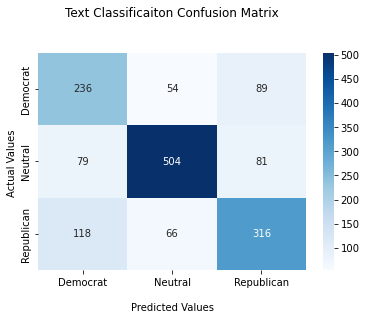

In [13]:
ax = sns.heatmap(conf, annot=True, fmt="g", cmap="Blues")
ax.set_title("Text Classificaiton Confusion Matrix\n\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("Actual Values ")
ax.xaxis.set_ticklabels(["Democrat", "Neutral", "Republican"])
ax.yaxis.set_ticklabels(["Democrat", "Neutral", "Republican"])
plt.savefig("../30_outputs/real_bayesian.png", bbox_inches="tight", dpi = 300)

In [14]:
print(metrics.classification_report(test_y, y_pred, target_names = ["democrat", "neutral", "republican"]))

              precision    recall  f1-score   support

    democrat       0.55      0.62      0.58       379
     neutral       0.81      0.76      0.78       664
  republican       0.65      0.63      0.64       500

    accuracy                           0.68      1543
   macro avg       0.67      0.67      0.67      1543
weighted avg       0.69      0.68      0.69      1543

